# Check abundances

Check how spectra with SNR 150-200 compared with VAC and ASPCAP, where they are not in training set but probably high enough for ASPCAP to product good enough valueimport pylab as plt

In [1]:
import pylab as plt

params = {
    'boxplot.boxprops.linewidth': 10.0,
    "figure.figsize": [8, 5],
    "axes.labelsize": 15,
    "axes.labelweight": "medium",
    "axes.titleweight": "medium",
    'legend.fontsize': 15,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "font.weight": "medium",
    # "text.usetex": True,
    "lines.linewidth": 1,
    "axes.titlesize": 15,
    # "font.family": "serif",
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    "ytick.right": True,
    "xtick.top": True,
    "ytick.direction": "in",
    "xtick.direction": "in",
    "ytick.major.size": 5,
    "ytick.major.width": 1,
    "ytick.minor.size": 3,
    "ytick.minor.width": 0.6,
    "xtick.major.size": 5,
    "xtick.major.width": 1,
    "xtick.minor.size": 3,
    "xtick.minor.width": 0.6,
}

plt.rcParams.update(params)

In [12]:
from astroNN.apogee import allstar, apogee_astronn
from astroNN.datasets import xmatch
from astropy.io import fits
import astropy

f = fits.getdata(allstar(dr=17))
astronn_VAC_f = fits.getdata(apogee_astronn(dr=17))
ra = f["RA"]
dec = f["DEC"]

ra[0] = 0
dec[0] = 0

good_idx = ((astronn_VAC_f["LOGG_ERR"] < 0.2) & (150<f["SNR"]) & (200>f["SNR"]))

f = f[good_idx]
astronn_VAC_f = astronn_VAC_f[good_idx]

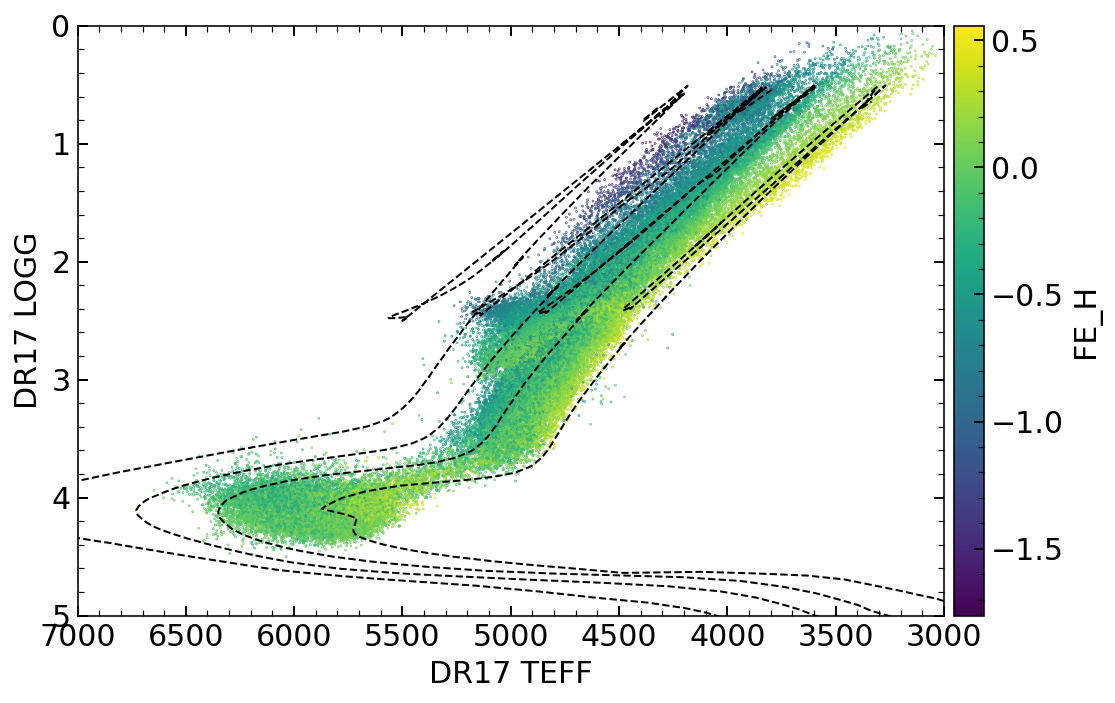

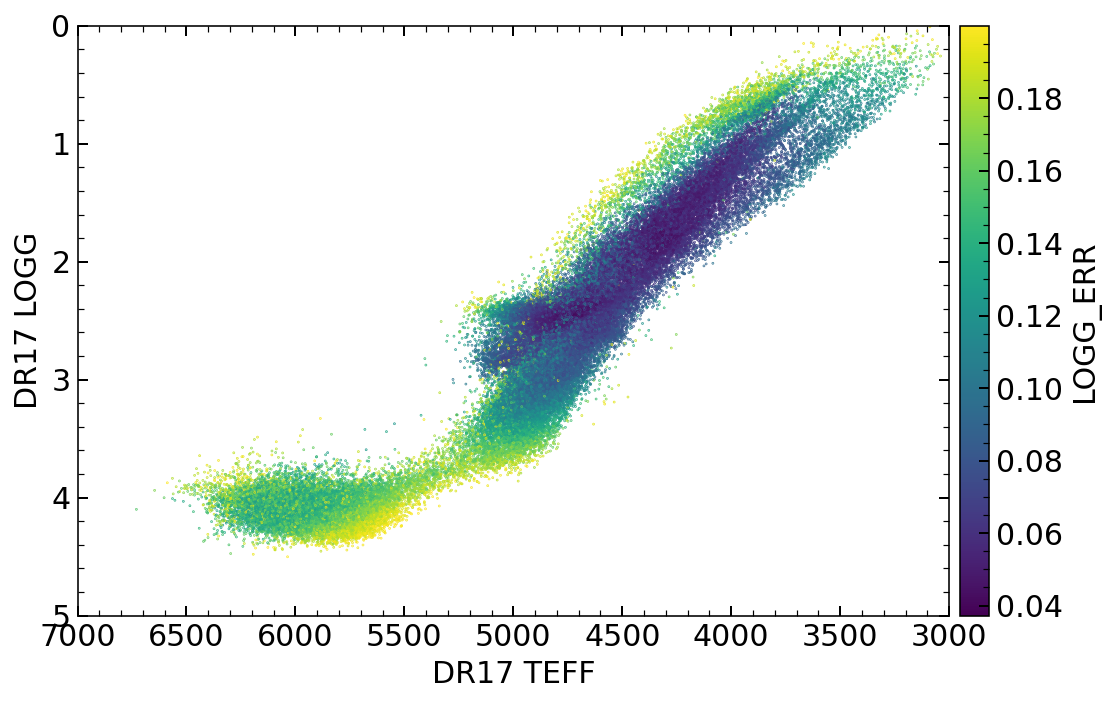

In [13]:
###### import astropy

data_isochrones = astropy.io.ascii.read('isochrones.dat')
M_H_isochrone = data_isochrones['col2']
teff_isochrone = 10 ** data_isochrones['col8']
logg_isochrone = data_isochrones['col9']

# load +0.5Z
good_idx_p050 = ((logg_isochrone > 0.5) & (teff_isochrone < 7500) & (M_H_isochrone == 0.5))

# load -0.25Z
good_idx_n025 = ((logg_isochrone > 0.5) & (teff_isochrone < 7500) & (M_H_isochrone == -0.25))

# load -0.75Z
good_idx_n075 = ((logg_isochrone > 0.5) & (teff_isochrone < 7500) & (M_H_isochrone == -0.75))

# load -1.5Z
good_idx_n175 = ((logg_isochrone > 0.5) & (teff_isochrone < 7500) & (M_H_isochrone == -1.5))

plt.figure()
plt.scatter(astronn_VAC_f["TEFF"], astronn_VAC_f["LOGG"], s=0.1, c=astronn_VAC_f["FE_H"])
plt.plot(teff_isochrone[good_idx_p050], logg_isochrone[good_idx_p050], lw=1., ls='--', c='k',
         label=r'$0.5 [M/H]$')
plt.plot(teff_isochrone[good_idx_n025], logg_isochrone[good_idx_n025], lw=1., ls='--', c='k',
         label=r'$-0.25 [M/H]$')
plt.plot(teff_isochrone[good_idx_n075], logg_isochrone[good_idx_n075], lw=1., ls='--', c='k',
         label=r'$-0.75 [M/H]$')
plt.plot(teff_isochrone[good_idx_n175], logg_isochrone[good_idx_n175], lw=1., ls='--', c='k',
         label=r'$-1.5 [M/H]$')
plt.xlabel("DR17 TEFF")
plt.ylabel("DR17 LOGG")
plt.xlim(7000, 3000)
plt.ylim(5, 0)
cbar = plt.colorbar(pad=0.01)
cbar.set_label("FE_H")
plt.tight_layout()

plt.figure()
plt.scatter(astronn_VAC_f["TEFF"], astronn_VAC_f["LOGG"], s=0.1, c=astronn_VAC_f["LOGG_ERR"])
plt.xlabel("DR17 TEFF")
plt.ylabel("DR17 LOGG")
plt.xlim(7000, 3000)
plt.ylim(5, 0)
cbar = plt.colorbar(pad=0.01)
cbar.set_label("LOGG_ERR")
plt.tight_layout()

median: -3.14
mad_std: 19.86


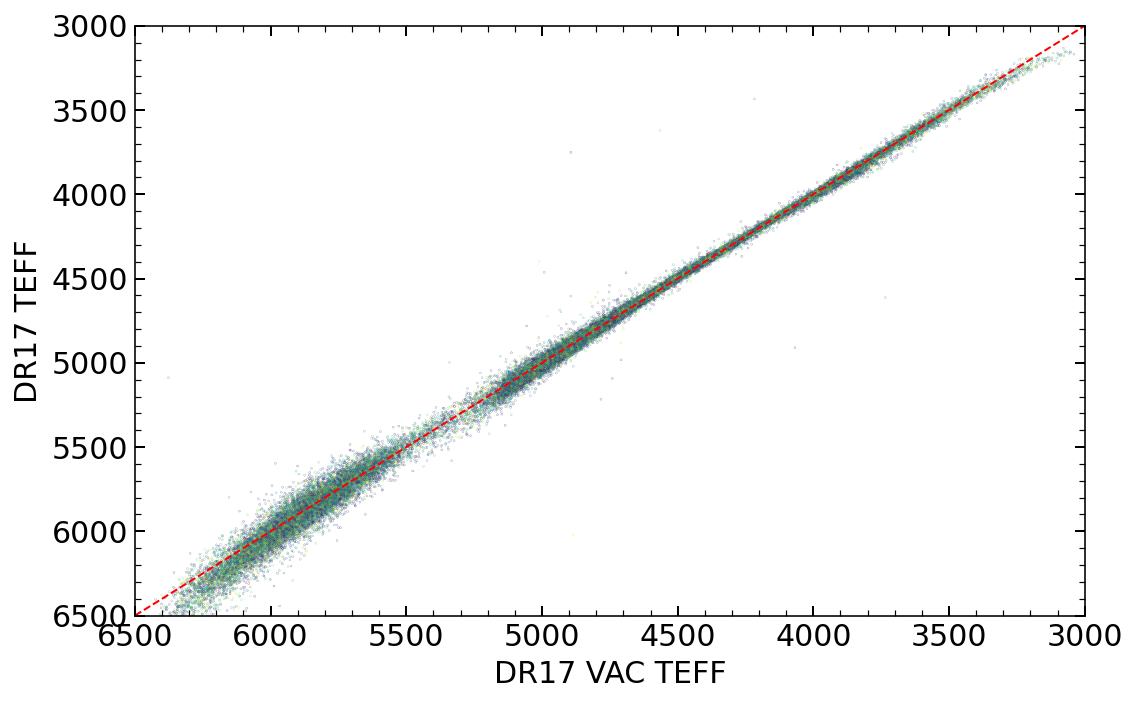

In [14]:
diff = astronn_VAC_f["TEFF"] - f["TEFF"]
print(f"median: {np.nanmedian(diff):.2f}")
print(f"mad_std: {1.48*np.nanmedian(np.abs(diff)):.2f}")

plt.figure()
plt.scatter(astronn_VAC_f["TEFF"], f["TEFF"], s=0.01, c=np.clip(f["SNR"], 50, 200))
plt.xlim(6500, 3000)
plt.ylim(6500, 3000)
plt.plot([6500, 3000], [6500, 3000], c="r", ls="--")
plt.xlabel("DR17 VAC TEFF")
plt.ylabel("DR17 TEFF")
plt.tight_layout()

median: -0.01
mad_std: 0.06


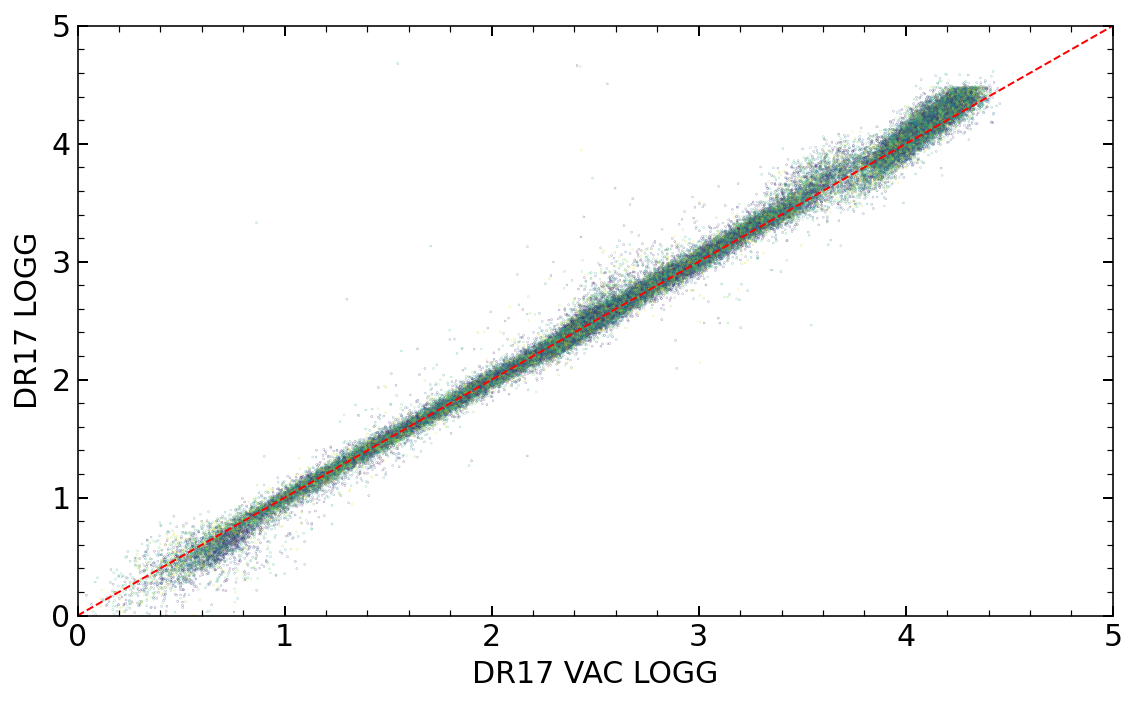

In [15]:
diff = astronn_VAC_f["LOGG"] - f["LOGG"]
print(f"median: {np.nanmedian(diff):.2f}")
print(f"mad_std: {1.48*np.nanmedian(np.abs(diff)):.2f}")

plt.figure()
plt.scatter(astronn_VAC_f["LOGG"], f["LOGG"], s=0.01, c=np.clip(f["SNR"], 50, 200))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.plot([0, 5], [0, 5], c="r", ls="--")
plt.xlabel("DR17 VAC LOGG")
plt.ylabel("DR17 LOGG")
plt.tight_layout()

median: -0.00
mad_std: 0.02


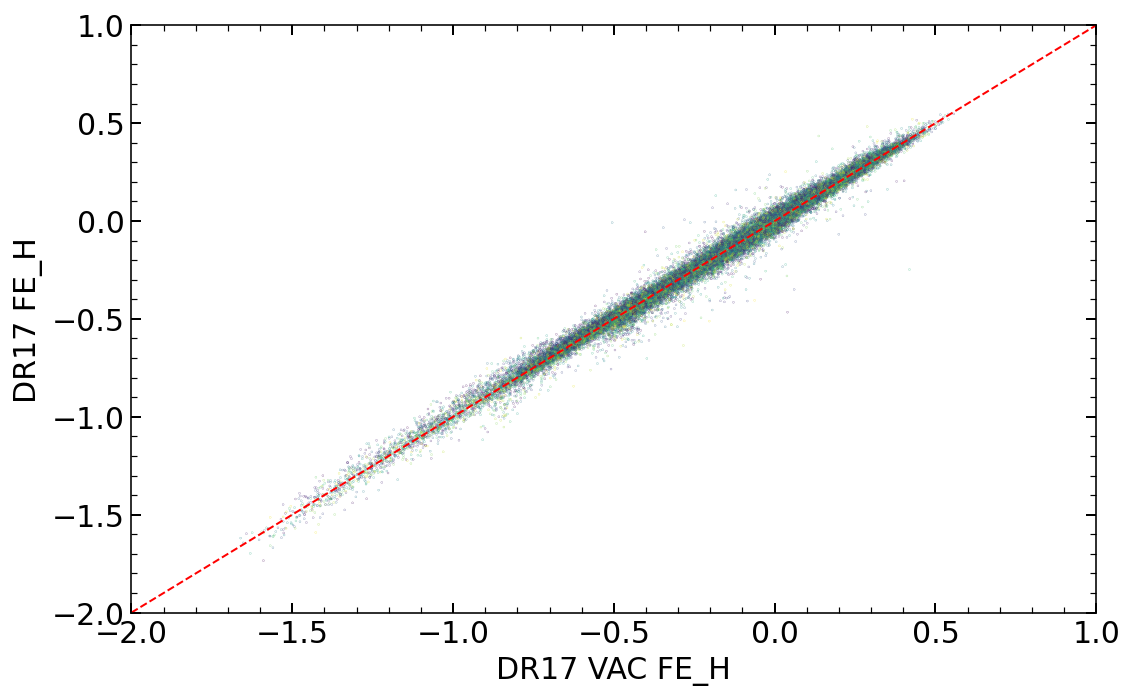

In [16]:
diff = astronn_VAC_f["FE_H"] - f["FE_H"]
print(f"median: {np.nanmedian(diff):.2f}")
print(f"mad_std: {1.48*np.nanmedian(np.abs(diff)):.2f}")

plt.figure()
plt.scatter(astronn_VAC_f["FE_H"], f["FE_H"], s=0.01, c=f["SNR"])
plt.xlim(-2.0, 1.0)
plt.ylim(-2.0, 1.0)
plt.plot([-2, 1], [-2, 1], c="r", ls="--")
plt.xlabel("DR17 VAC FE_H")
plt.ylabel("DR17 FE_H")
plt.tight_layout()

## North-South overlaps

In [20]:
from astroNN.apogee import allstar, apogee_astronn
from astroNN.datasets import xmatch
from astropy.io import fits

f = fits.getdata(allstar(dr=17))
astronn_VAC_f = fits.getdata(apogee_astronn(dr=17))
ra = f["RA"]
dec = f["DEC"]

ra[0] = 0
dec[0] = 0

good_idx = ((astronn_VAC_f["LOGG_ERR"] < 0.2) & (200<f["SNR"]))

f = f[good_idx]
astronn_VAC_f = astronn_VAC_f[good_idx]


north = (f["TELESCOPE"] == "apo25m")
south = (f["TELESCOPE"] == "lco25m")

idx1, idx2, sep = xmatch(f[north]["RA"], f[north]["DEC"], f[south]["RA"], f[south]["DEC"])


diff = astronn_VAC_f["TEFF"][north][idx1] - f["TEFF"][south][idx2]
print("TEFF")
print(f"median: {np.nanmedian(diff):.2f}")
print(f"mad_std: {1.48*np.nanmedian(np.abs(diff)):.2f}")

diff = astronn_VAC_f["LOGG"][north][idx1] - f["LOGG"][south][idx2]
print("LOGG")
print(f"median: {np.nanmedian(diff):.2f}")
print(f"mad_std: {1.48*np.nanmedian(np.abs(diff)):.2f}")

diff = astronn_VAC_f["FE_H"][north][idx1] - f["FE_H"][south][idx2]
print("FE_H")
print(f"median: {np.nanmedian(diff):.2f}")
print(f"mad_std: {1.48*np.nanmedian(np.abs(diff)):.2f}")

TEFF
median: -1.04
mad_std: 23.33
LOGG
median: 0.01
mad_std: 0.07
FE_H
median: -0.01
mad_std: 0.02
